In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Change directory to the (current) JSRT directory
%cd '/content/drive/MyDrive/Segmentation Project'

/content/drive/.shortcut-targets-by-id/1X8A5RN_rhqzBPw4pXa6OGeIR3yIcDYgI/Segmentation Project


In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1X8A5RN_rhqzBPw4pXa6OGeIR3yIcDYgI/Segmentation Project


In [ ]:
import scipy.io as sio
import numpy as np
import glob, re
import matplotlib.pyplot as plt
from skimage.transform import resize
from PIL import Image
import PIL


In [ ]:
#train-set
#Get the image and label (left-right lungs, heart, left-right clavicles) files
imgfiles = glob.glob("./images/train" + "/*.IMG")
lab1files = glob.glob("./left-lung/train" + "/*.gif")
lab2files = glob.glob("./right-lung/train" + "/*.gif")
lab3files = glob.glob("./heart/train" + "/*.gif")
lab4files = glob.glob("./left-clavicle/train" + "/*.gif")
lab5files = glob.glob("./right-clavicle/train" + "/*.gif")

#Sort the files in ascending order
imgfiles.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[0-9]|[0-9]+', var)])
lab1files.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[0-9]|[0-9]+', var)])
lab2files.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[0-9]|[0-9]+', var)])
lab3files.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[0-9]|[0-9]+', var)])
lab4files.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[0-9]|[0-9]+', var)])
lab5files.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[0-9]|[0-9]+', var)])

train_images, train_labels = [], [] #initialize train_images and train_labels to store the images and labels 

img_shape = (2048, 2048) # matrix size: current image size
dtype = np.dtype('>u2') # big-endian unsigned integer (16bit)

for i in range(len(imgfiles)):
    print(imgfiles[i], lab1files[i], lab2files[i], lab3files[i], lab4files[i], lab5files[i])
    
    fid = Image.open(imgfiles[i])
    im = fid.resize(img_shape)
    im = 1. - im/np.max(im)
    im = resize(im, [256, 256, 1]) #new size: 256x256

    lab1 = plt.imread(lab1files[i])
    lab2 = plt.imread(lab2files[i])
    lab3 = plt.imread(lab3files[i])
    lab4 = plt.imread(lab4files[i])
    lab5 = plt.imread(lab5files[i])
    lab1 = resize(lab1, [256, 256, 1]) #left lung
    lab2 = resize(lab2, [256, 256, 1]) #right lung
    lab3 = resize(lab3, [256, 256, 1]) #heart
    lab4 = resize(lab4, [256, 256, 1]) #left clavicle
    lab5 = resize(lab5, [256, 256, 1]) #right clavicle
    lab = np.concatenate([lab1, lab2, lab3, lab4,lab5], -1)
    
    train_images.append(im)
    train_labels.append(lab)

train_images = np.reshape(train_images, [-1, 256, 256, 1])
train_labels = np.reshape(train_labels, [-1, 256, 256, 5])

idx = np.arange(train_images.shape[0])
idx = np.random.shuffle(idx)
train_images = train_images[idx][0]
train_labels = train_labels[idx][0]

train_images.shape, train_labels.shape

./images/train/JPCLN001.IMG ./left-lung/train/JPCLN001.gif ./right-lung/train/JPCLN001.gif ./heart/train/JPCLN001.gif ./left-clavicle/train/JPCLN001.gif ./right-clavicle/train/JPCLN001.gif
./images/train/JPCLN002.IMG ./left-lung/train/JPCNN001.gif ./right-lung/train/JPCNN001.gif ./heart/train/JPCNN001.gif ./left-clavicle/train/JPCNN001.gif ./right-clavicle/train/JPCNN001.gif
./images/train/JPCLN003.IMG ./left-lung/train/JPCLN003.gif ./right-lung/train/JPCLN003.gif ./heart/train/JPCLN003.gif ./left-clavicle/train/JPCLN003.gif ./right-clavicle/train/JPCLN003.gif
./images/train/JPCLN004.IMG ./left-lung/train/JPCNN003.gif ./right-lung/train/JPCNN003.gif ./heart/train/JPCNN003.gif ./left-clavicle/train/JPCNN003.gif ./right-clavicle/train/JPCNN003.gif
./images/train/JPCLN005.IMG ./left-lung/train/JPCLN005.gif ./right-lung/train/JPCLN005.gif ./heart/train/JPCLN005.gif ./left-clavicle/train/JPCLN005.gif ./right-clavicle/train/JPCLN005.gif
./images/train/JPCLN006.IMG ./left-lung/train/JPCNN005.

((123, 256, 256, 1), (123, 256, 256, 5))

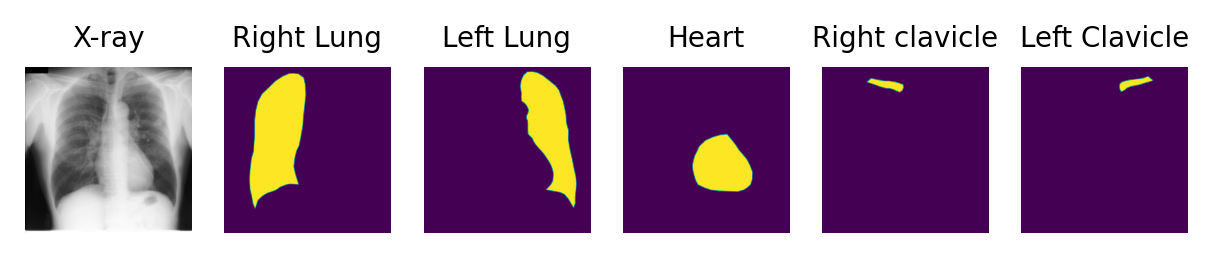

In [ ]:
#Visualize an image and corresponding labels (left/right lungs, heart, left-right clavicles)
plt.figure(dpi=250)
plt.subplot(1,6,1)
plt.imshow(train_images[0,:,:,0], cmap='gray')
plt.title('X-ray',fontsize = 8)
plt.axis('off')
plt.subplot(1,6,2)
plt.imshow(train_labels[0,:,:,1])
plt.title('Right Lung',fontsize = 8)
plt.axis('off')
plt.subplot(1,6,3)
plt.imshow(train_labels[0,:,:,0])
plt.title('Left Lung',fontsize = 8)
plt.axis('off')
plt.subplot(1,6,4)
plt.imshow(train_labels[0,:,:,2])
plt.title('Heart',fontsize = 8)
plt.axis('off')
plt.subplot(1,6,5)
plt.imshow(train_labels[0,:,:,4])
plt.title('Right clavicle',fontsize = 8)
plt.axis('off')
plt.subplot(1,6,6)
plt.imshow(train_labels[0,:,:,3])
plt.title('Left Clavicle',fontsize = 8)
plt.axis('off')
plt.show()

In [ ]:
#test-set

imgfiles = glob.glob("./images/test" + "/*.IMG")
lab1files = glob.glob("./left-lung/train" + "/*.gif")
lab2files = glob.glob("./right-lung/train" + "/*.gif")
lab3files = glob.glob("./heart/train" + "/*.gif")
lab4files = glob.glob("./left-clavicle/train" + "/*.gif")
lab5files = glob.glob("./right-clavicle/train" + "/*.gif")

x_test = []
y_test = []

img_shape = (2048, 2048) # matrix size
dtype = np.dtype('>u2') # big-endian unsigned integer (16bit)


for i in range(len(imgfiles)-1):
    fid = Image.open(imgfiles[i])
    im = fid.resize(img_shape)
    im = 1. - im/np.max(im)
    im = resize(im, [256, 256, 1])
    
    
    lab1 = plt.imread(lab1files[i])
    lab2 = plt.imread(lab2files[i])
    lab3 = plt.imread(lab3files[i])
    lab4 = plt.imread(lab4files[i])
    lab5 = plt.imread(lab5files[i])
    lab1 = resize(lab1, [256, 256, 1]) #left lung
    lab2 = resize(lab2, [256, 256, 1]) #right lung
    lab3 = resize(lab3, [256, 256, 1]) #heart
    lab4 = resize(lab4, [256, 256, 1]) #left clavicle
    lab5 = resize(lab5, [256, 256, 1]) #right clavicle
    lab = np.concatenate([lab1, lab2, lab3, lab4,lab5], -1)
    
    x_test.append(im)
    y_test.append(lab)

x_test = np.reshape(x_test, [-1, 256, 256, 1])
y_test = np.reshape(y_test, [-1, 256, 256, 5])
x_test.shape, y_test.shape

((123, 256, 256, 1), (123, 256, 256, 5))

In [ ]:
from sklearn.model_selection import train_test_split

#Split the train_images into into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.05)

#Check the shapes/sizes of train, test, and validation sets
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((116, 256, 256, 1),
 (116, 256, 256, 5),
 (123, 256, 256, 1),
 (123, 256, 256, 5),
 (7, 256, 256, 1),
 (7, 256, 256, 5))

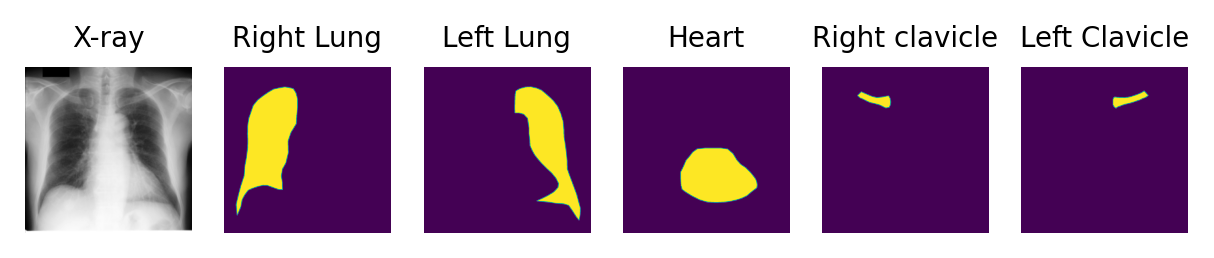

In [ ]:
plt.figure(dpi=250)
plt.subplot(1,6,1)
plt.imshow(x_val[0,:,:,0], cmap='gray')
plt.title('X-ray',fontsize=8)
plt.axis('off')
plt.subplot(1,6,2)
plt.imshow(y_val[0,:,:,1])
plt.title('Right Lung',fontsize=8)
plt.axis('off')
plt.subplot(1,6,3)
plt.imshow(y_val[0,:,:,0])
plt.title('Left Lung',fontsize=8)
plt.axis('off')
plt.subplot(1,6,4)
plt.imshow(y_val[0,:,:,2])
plt.title('Heart',fontsize = 8)
plt.axis('off')
plt.subplot(1,6,5)
plt.imshow(y_val[0,:,:,4])
plt.title('Right clavicle',fontsize = 8)
plt.axis('off')
plt.subplot(1,6,6)
plt.imshow(y_val[0,:,:,3])
plt.title('Left Clavicle',fontsize = 8)
plt.axis('off')
plt.show()

In [ ]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)
    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [ ]:
IMG_HEIGHT = x_train.shape[1]
IMG_WIDTH  = x_train.shape[2]
IMG_CHANNELS = x_train.shape[3]
input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
print(input_shape)


(256, 256, 1)


In [ ]:
model = build_unet(input_shape, n_classes=5)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

softmax
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                     

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callbacks = [
    #EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, min_lr=0.0001, verbose=1),
    ModelCheckpoint('model-jsrt-multiclass-3.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [ ]:
results = model.fit(x_train, y_train, batch_size=16, epochs=100, callbacks=callbacks,validation_data=(x_val, y_val))

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 0.5452 - accuracy: 0.4054
Epoch 1: val_loss improved from inf to 0.61737, saving model to model-jsrt-multiclass-3.h5
8/8 [==============================] - 36s 2s/step - loss: 0.5452 - accuracy: 0.4054 - val_loss: 0.6174 - val_accuracy: 0.1702 - lr: 0.0010
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 0.5019 - accuracy: 0.4449
Epoch 2: val_loss did not improve from 0.61737
8/8 [==============================] - 6s 741ms/step - loss: 0.5019 - accuracy: 0.4449 - val_loss: 0.7010 - val_accuracy: 0.2942 - lr: 0.0010
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.4292 - accuracy: 0.5561
Epoch 3: val_loss did not improve from 0.61737
8/8 [==============================] - 6s 750ms/step - loss: 0.4292 - accuracy: 0.5561 - val_loss: 4.7715 - val_accuracy: 0.3349 - lr: 0.0010
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 0.2983 - accuracy: 0.6736
Epoch 4: val_loss d

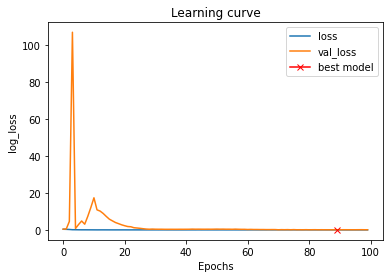

In [ ]:
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [20]:
# load the best model
model.load_weights('model-jsrt-multiclass-3.h5')

In [22]:
# Evaluate on validation set (this must be equals to the best log_loss)
model.evaluate(x_val, y_val, verbose=1)

1/1 [==============================] - 0s 230ms/step - loss: 0.2504 - accuracy: 0.8096


[0.25040897727012634, 0.8095833659172058]

In [23]:
def plot_sample(X, y, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 6, figsize=(20, 10))
    ax[0].imshow(X[ix,:,:,0], cmap='gray')
    if has_mask:
        ax[0].contour(y[ix,:,:,0].squeeze(), levels=[0.5])
        ax[0].contour(y[ix,:,:,1].squeeze(), levels=[0.5])
        ax[0].contour(y[ix,:,:,2].squeeze(), levels=[0.5])
        ax[0].contour(y[ix,:,:,3].squeeze(), levels=[0.5])
        ax[0].contour(y[ix,:,:,4].squeeze(), levels=[0.5])
    ax[0].set_title('Image with mask')

    ax[1].imshow(y[ix,:,:,1].squeeze())
    ax[1].set_title('Right Lung')

    ax[2].imshow(y[ix,:,:,0].squeeze())
    ax[2].set_title('Left Lung')

    ax[3].imshow(y[ix,:,:,2].squeeze())
    ax[3].set_title('Heart')

    ax[4].imshow(y[ix,:,:,4].squeeze())
    ax[4].set_title('Left Calvicle')

    ax[5].imshow(y[ix,:,:,3].squeeze())
    ax[5].set_title('Right Calvicle')

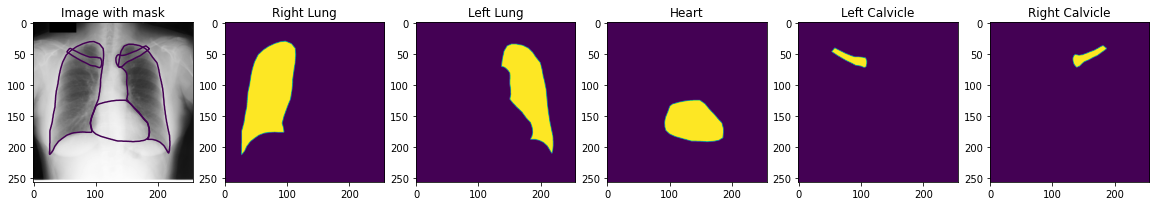

In [24]:
# Check if training data looks all right
plot_sample(x_train, y_train, ix=0)

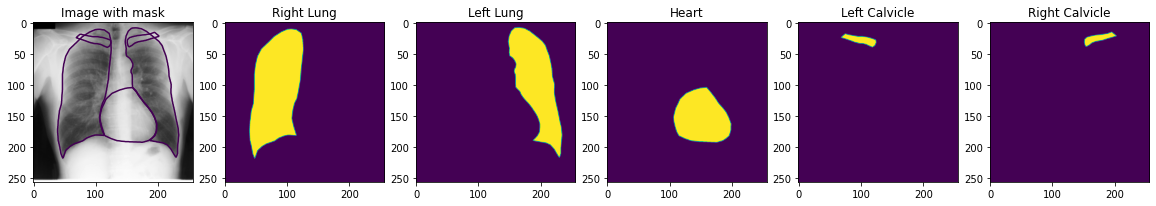

In [25]:
plot_sample(x_train, y_train, ix=1)

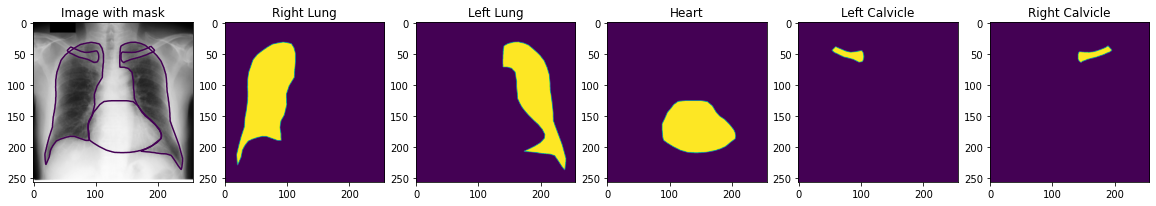

In [26]:
# Check if valid data looks all right
plot_sample(x_val, y_val, ix=0)

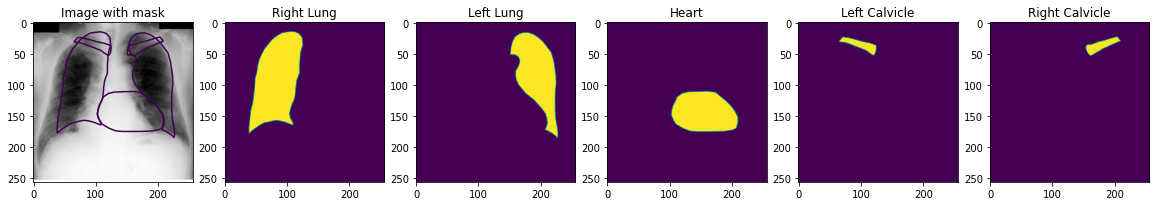

In [27]:
plot_sample(x_val, y_val, ix=1)

In [29]:
model.predict_on_batch(x_test)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-f692f29dc5f2>", line 1, in <module>
    model.predict_on_batch(x_test)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 2179, in predict_on_batch
    outputs = self.predict_function(iterator)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/traceback_utils.py", line 153, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/lib/python3.7/traceback.py", line 39, in format_list
    return StackSummary.from_list(extracted_list).format()
  File "/usr/lib/python3.7/traceback.py", line 381, in from_list
    filename, lineno, name, line = frame
  File "/usr/lib/python3.7/inspect.py", line 725, in getmodule
    file = getabsfile(object, _filename)
  File "/usr/lib/python3.7/inspect.py", line 709, in ge

FileNotFoundError: ignored